In [1]:
#importing important libraries
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter("ignore")

In [2]:
#Read the dataset
df=pd.read_csv('exam_data.csv')

In [3]:
#It prints first 5 rows.
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-19 20:49:55,2016-02-19 21:06:27,1,3.80,-74.007248,40.728363,1,N,...,15.0,0.5,0.5,3.25,0.0,0.3,19.55,True,True,False
1,2,1,2016-02-19 20:50:06,2016-02-19 20:56:15,1,0.90,-73.986237,40.751873,1,N,...,6.0,0.5,0.5,0.70,0.0,0.3,8.00,False,True,False
2,3,2,2016-02-19 20:50:15,2016-02-19 20:58:04,6,1.62,-73.970978,40.795971,1,N,...,8.0,0.5,0.5,2.32,0.0,0.3,11.62,True,True,False
3,4,1,2016-02-07 16:20:40,2016-02-07 16:29:06,1,1.40,-73.991173,40.770405,1,N,...,7.5,0.0,0.5,1.65,0.0,0.3,9.95,False,False,False
4,5,2,2016-02-19 20:50:53,2016-02-19 20:55:56,5,0.55,-73.981522,40.744091,1,N,...,5.0,0.5,0.5,1.58,0.0,0.3,7.88,False,True,False


# Data Cleaning

In [4]:
df.shape

(28454, 23)

In [5]:
#To know the information of the entire dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28454 entries, 0 to 28453
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             28454 non-null  int64  
 1   VendorID               28454 non-null  int64  
 2   tpep_pickup_datetime   28454 non-null  object 
 3   tpep_dropoff_datetime  28454 non-null  object 
 4   passenger_count        28454 non-null  int64  
 5   trip_distance          28454 non-null  float64
 6   pickup_longitude       28454 non-null  float64
 7   pickup_latitude        28454 non-null  float64
 8   RatecodeID             28454 non-null  int64  
 9   store_and_fwd_flag     28454 non-null  object 
 10  dropoff_longitude      28454 non-null  float64
 11  dropoff_latitude       28454 non-null  float64
 12  payment_type           28454 non-null  int64  
 13  fare_amount            28454 non-null  float64
 14  extra                  28454 non-null  float64
 15  mt

In [6]:
#To describe the dataset. 
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000,28454.000000
mean,14227.500000,1.535636,1.658818,2.857588,-72.897624,40.158330,1.038132,-72.946662,40.186571,1.330709,12.422048,0.329304,0.497716,1.772581,0.294971,0.299831,15.616452
std,8214.106616,0.498737,1.321108,3.672500,8.858006,4.879793,0.293417,8.655240,4.768268,0.485115,10.945736,0.444981,0.035248,2.446154,1.543549,0.009409,13.491867
min,1.000000,1.000000,0.000000,0.000000,-74.181488,0.000000,1.000000,-74.479347,0.000000,1.000000,-3.500000,-0.500000,-0.500000,0.000000,0.000000,-0.300000,-4.800000
25%,7114.250000,1.000000,1.000000,1.000000,-73.991585,40.736328,1.000000,-73.991096,40.735144,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,14227.500000,2.000000,1.000000,1.670000,-73.981483,40.753857,1.000000,-73.979370,40.754065,1.000000,9.000000,0.000000,0.500000,1.350000,0.000000,0.300000,11.750000
75%,21340.750000,2.000000,2.000000,3.070000,-73.966507,40.768020,1.000000,-73.962097,40.769721,2.000000,14.000000,0.500000,0.500000,2.350000,0.000000,0.300000,17.250000
max,28454.000000,2.000000,6.000000,184.200000,0.000000,41.037102,5.000000,0.000000,41.152634,4.000000,325.000000,5.500000,0.500000,65.000000,95.540000,0.300000,325.800000


Unnecessary columns to drop.

In [7]:
df = df.drop(['Unnamed: 0'], axis= 1)

In [8]:
# Remove duplicates 
# From here on, I'm going to rename the dataframe from df to td for temporary data, thus not altering the original dataframe until much later. 
td = df.drop_duplicates()
print(f"{df.shape[0] - td.shape[0]} duplicate rows dropped. Thats {df.shape[0] / td.shape[0] * 100}%")
print(f"{td.shape[0]} rows remain.")

0 duplicate rows dropped. Thats 100.0%
28454 rows remain.


In [9]:
td.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
GoodTip                  0
Extra                    0
Cash                     0
dtype: int64

In [10]:
# Dropping rows such as Total Amount, fare amount and trip distance cannot be less than zero.
td=  td[td['total_amount'] > 0]
td = td[td['trip_distance'] > 0]
td = td[td['fare_amount'] > 0]


In [11]:
df.shape

(28454, 22)

In [12]:
#converting date into valid datetime
td['tpep_pickup_datetime'] = pd.to_datetime(td['tpep_pickup_datetime'])
td['tpep_dropoff_datetime'] = pd.to_datetime(td['tpep_dropoff_datetime'])

In [13]:
#To get specific year, month, day for data exploration

td['year'] = pd.to_datetime(td['tpep_pickup_datetime']).dt.year
td['month'] = pd.to_datetime(td['tpep_pickup_datetime']).dt.month
td['day'] = pd.to_datetime(td['tpep_pickup_datetime']).dt.day
td['day_of_week'] = pd.to_datetime(td['tpep_pickup_datetime']).dt.dayofweek
td['hour_of_day'] = pd.to_datetime(td['tpep_pickup_datetime']).dt.hour

In [14]:
pickup_array = td['tpep_pickup_datetime'].values
dropoff_array = td['tpep_dropoff_datetime'].values

# Getting the new timedelta, this takes less than a second to complete compared to 15+ minutes with apply()
trip_duration = np.subtract(dropoff_array, pickup_array)

# Adding the resulting array to the dataframe in the trip_duration column
td['trip_duration'] = pd.Series(trip_duration)

# Converting the timedelta to number of minutes
td['trip_duration'] = td['trip_duration'].dt.total_seconds()/60

# Preview the results
td.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,total_amount,GoodTip,Extra,Cash,year,month,day,day_of_week,hour_of_day,trip_duration
0,1,2016-02-19 20:49:55,2016-02-19 21:06:27,1,3.80,-74.007248,40.728363,1,N,-73.971664,...,19.55,True,True,False,2016,2,19,4,20,16.533333
1,1,2016-02-19 20:50:06,2016-02-19 20:56:15,1,0.90,-73.986237,40.751873,1,N,-73.990044,...,8.00,False,True,False,2016,2,19,4,20,6.150000
2,2,2016-02-19 20:50:15,2016-02-19 20:58:04,6,1.62,-73.970978,40.795971,1,N,-73.977440,...,11.62,True,True,False,2016,2,19,4,20,7.816667
3,1,2016-02-07 16:20:40,2016-02-07 16:29:06,1,1.40,-73.991173,40.770405,1,N,-73.970581,...,9.95,False,False,False,2016,2,7,6,16,8.433333
4,2,2016-02-19 20:50:53,2016-02-19 20:55:56,5,0.55,-73.981522,40.744091,1,N,-73.989189,...,7.88,False,True,False,2016,2,19,4,20,5.050000


In [15]:
#Now, the datetime columns can be dropped entirely!


td.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [16]:
# Calculating total amounts and dropping rows whose values don't "add up"...
fare = td['fare_amount'].values
extra = np.add(fare, td['extra'].values)
mta_tax = np.add(extra, td['mta_tax'].values)
tip_amount = np.add(mta_tax, td['tip_amount'].values)
imp_surcharge = np.add(tip_amount, td['improvement_surcharge'].values)
calculated_total_amount = np.add(imp_surcharge, td['tolls_amount'].values)

td['calculated_total_amount'] = pd.Series(calculated_total_amount)

# validate calculated total by manually adding all relevant columns and comparing to the calculated column
td.head(10)

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,GoodTip,Extra,Cash,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
0,1,1,3.80,-74.007248,40.728363,1,N,-73.971664,40.691978,1,...,True,True,False,2016,2,19,4,20,16.533333,19.55
1,1,1,0.90,-73.986237,40.751873,1,N,-73.990044,40.744843,1,...,False,True,False,2016,2,19,4,20,6.150000,8.00
2,2,6,1.62,-73.970978,40.795971,1,N,-73.977440,40.776749,1,...,True,True,False,2016,2,19,4,20,7.816667,11.62
3,1,1,1.40,-73.991173,40.770405,1,N,-73.970581,40.759354,1,...,False,False,False,2016,2,7,6,16,8.433333,9.95
4,2,5,0.55,-73.981522,40.744091,1,N,-73.989189,40.744129,1,...,False,True,False,2016,2,19,4,20,5.050000,7.88
5,1,1,6.30,-73.982903,40.734776,1,N,-73.946548,40.796436,2,...,False,True,True,2016,2,19,4,20,16.266667,20.30
6,1,2,1.80,-73.995293,40.759205,1,N,-73.966133,40.752869,2,...,False,True,True,2016,2,19,4,20,13.033333,8.30
7,1,2,5.80,-73.975090,40.760193,5,N,-74.043175,40.775936,1,...,True,False,False,2016,2,19,4,20,20.016667,52.55
8,1,1,1.90,-73.975929,40.744556,1,N,-74.001419,40.739258,1,...,True,True,False,2016,2,19,4,20,12.750000,13.55
9,2,1,2.06,-73.967911,40.759621,1,N,-73.984840,40.776779,1,...,True,True,False,2016,2,19,4,20,11.350000,12.80


In [17]:
# Dropping anything that isn't correct
td = td[td['total_amount'] != td['calculated_total_amount']]

td.shape

(27802, 27)

In [18]:
#Saving the clean dataset

td.to_csv('cleaned_nyc_taxi_data_2016.csv')
print('Done!')

Done!


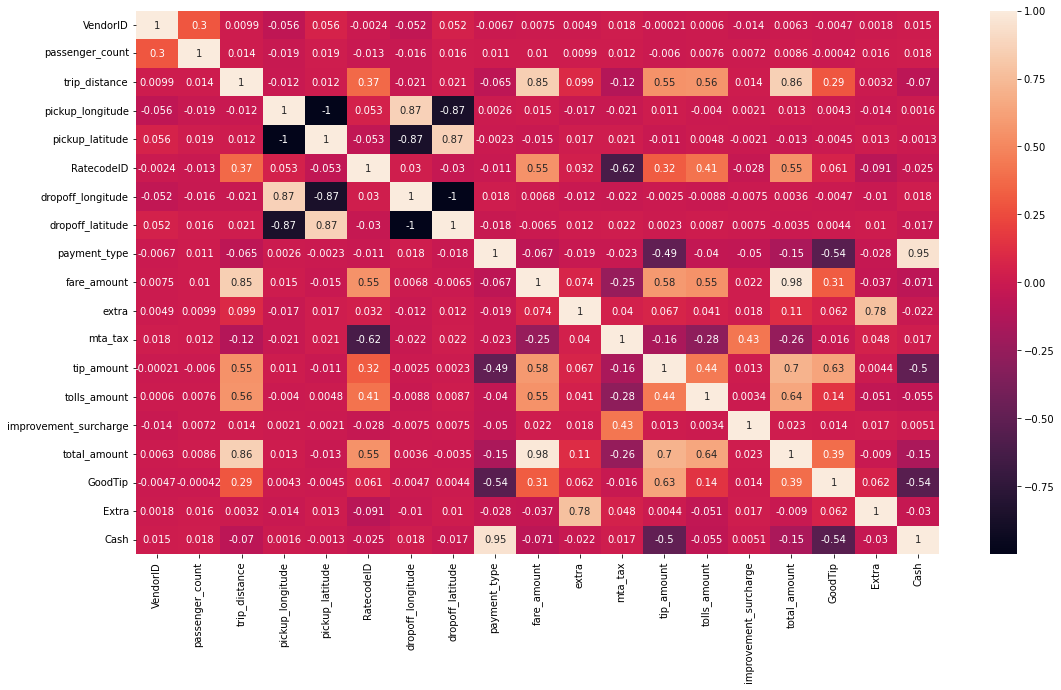

In [19]:
plt.figure(figsize= (18, 10))
sb.heatmap(df.corr(), annot= True);

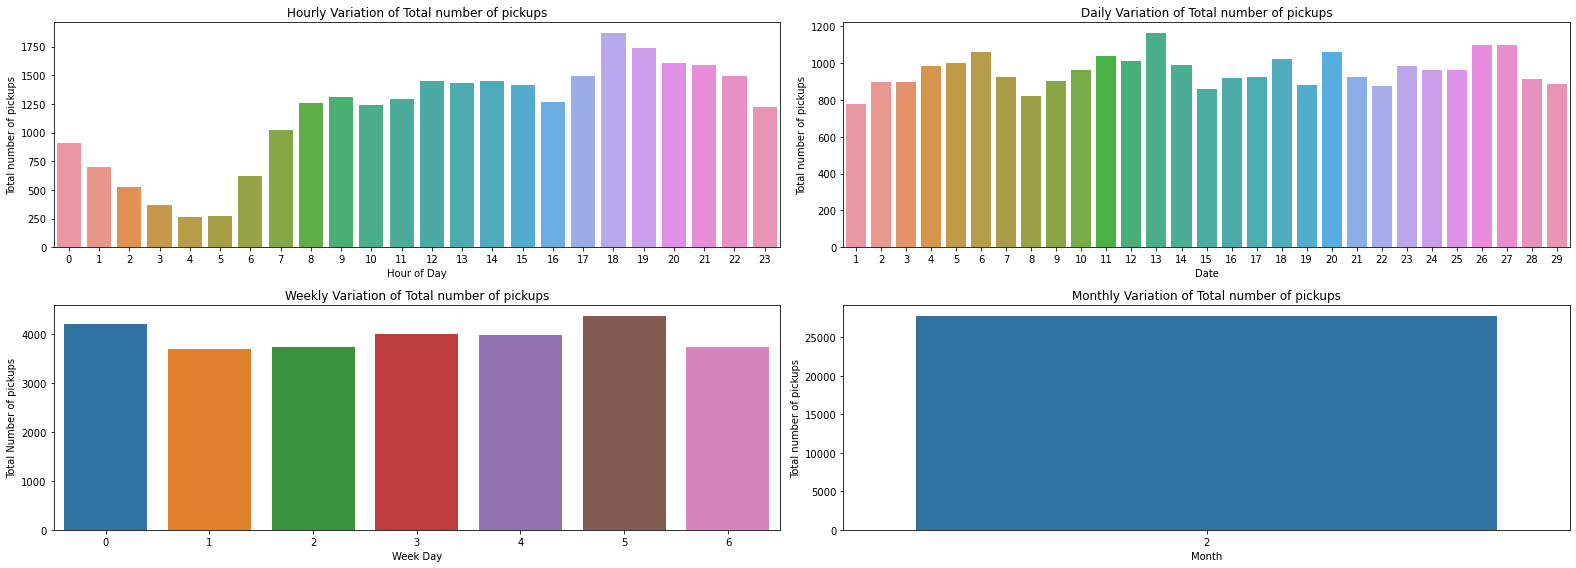

In [20]:
# Datetime features
plt.figure(figsize=(22, 8))

# Hour of day
plt.subplot(221)
sb.countplot(td['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')
plt.title('Hourly Variation of Total number of pickups')

# Date
plt.subplot(222)
sb.countplot(td['day'])
plt.xlabel('Date')
plt.ylabel('Total number of pickups')
plt.title('Daily Variation of Total number of pickups')

# Day of week
plt.subplot(223)
sb.countplot(td['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')
plt.title('Weekly Variation of Total number of pickups')

# Month
plt.subplot(224)
sb.countplot(td['month'])
plt.xlabel('Month')
plt.ylabel('Total number of pickups')
plt.title('Monthly Variation of Total number of pickups')
plt.tight_layout();

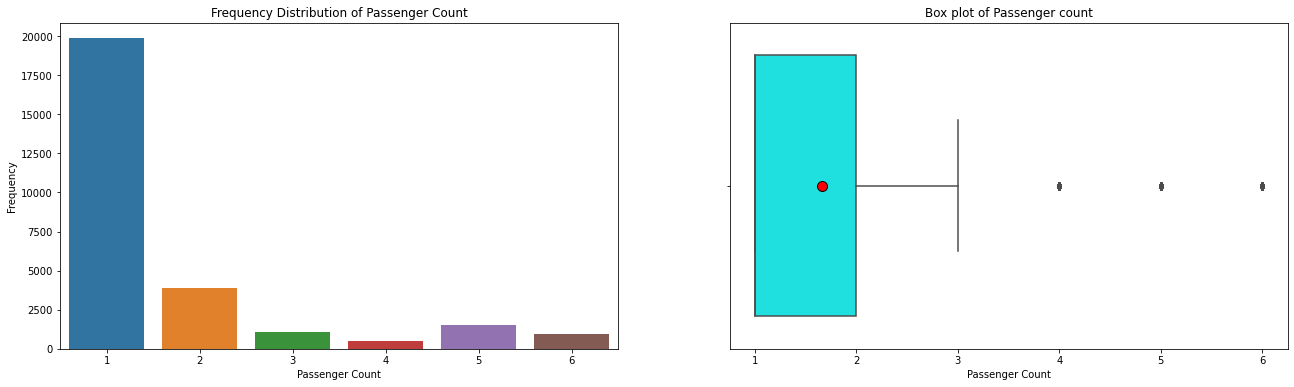

In [21]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(121)
sb.countplot(td['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Passenger Count')

#Box plot of passenger count
plt.subplot(122)
sb.boxplot(td['passenger_count'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title('Box plot of Passenger count');

<AxesSubplot:xlabel='GoodTip', ylabel='count'>

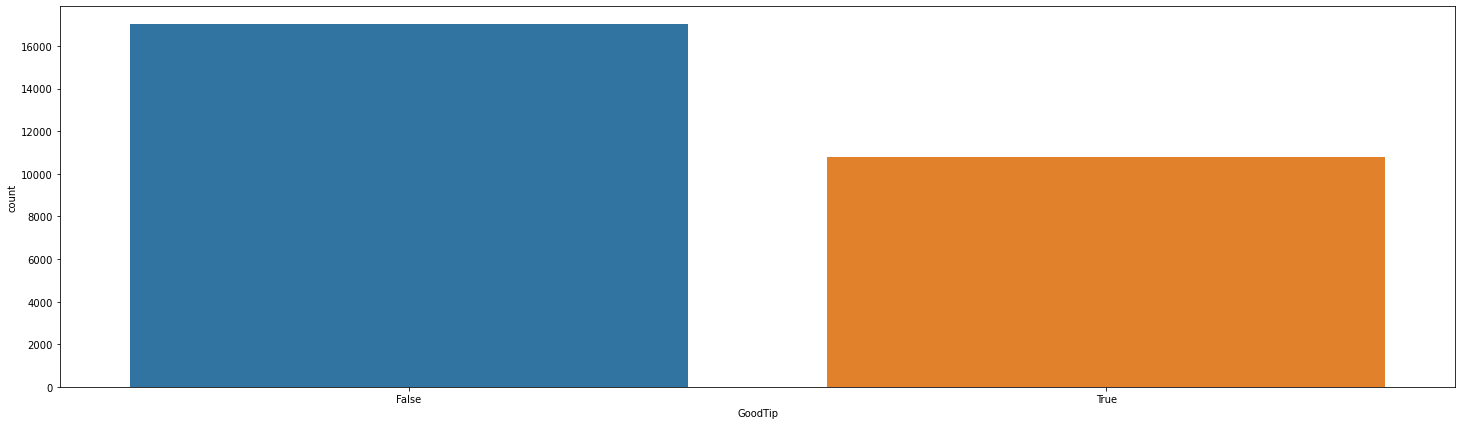

In [22]:
plt.figure(figsize=(25,7))
sb.countplot(x=td["GoodTip"])

Text(0.5, 1.0, 'Good Tip by tip amount')

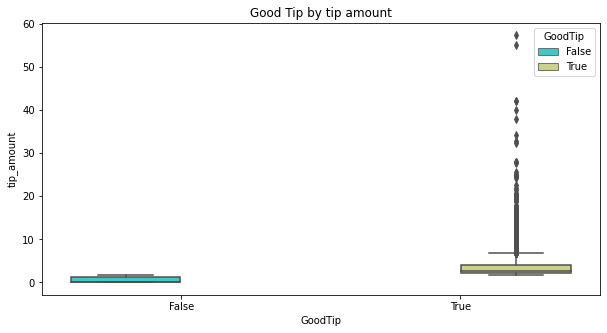

In [23]:
plt.figure(figsize=(10,5))
sb.boxplot(x='GoodTip',y='tip_amount',data= td, palette='rainbow', hue='GoodTip')
plt.title("Good Tip by tip amount")

<AxesSubplot:>

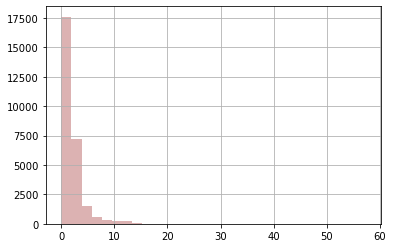

In [24]:
td['tip_amount'].hist(bins=30,color='darkred',alpha=0.3)

<AxesSubplot:>

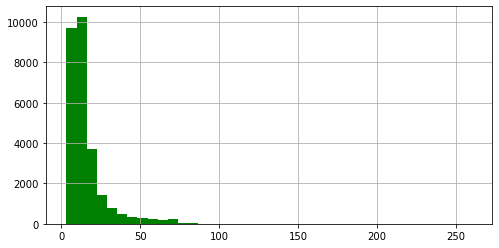

In [25]:
td['total_amount'].hist(color='green',bins=40,figsize=(8,4))


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [27]:
td['store_and_fwd_flag'] = le.fit_transform(td['store_and_fwd_flag'])
td.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,GoodTip,Extra,Cash,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
2,2,6,1.62,-73.970978,40.795971,1,0,-73.977440,40.776749,1,...,True,True,False,2016,2,19,4,20,7.816667,11.62
3,1,1,1.40,-73.991173,40.770405,1,0,-73.970581,40.759354,1,...,False,False,False,2016,2,7,6,16,8.433333,9.95
23,1,1,2.40,-73.985085,40.768658,1,0,-74.005608,40.737667,1,...,True,True,False,2016,2,19,4,21,17.733333,17.15
25,2,1,1.77,-73.973061,40.758461,1,0,-73.953392,40.772461,1,...,True,True,False,2016,2,19,4,21,7.250000,11.76
33,1,1,7.00,-73.977936,40.783821,1,0,-73.929276,40.863331,1,...,True,True,False,2016,2,19,4,21,12.733333,26.15


In [28]:
td['GoodTip'] = le.fit_transform(td['GoodTip'])
td['Extra'] = le.fit_transform(td['Extra'])
td['Cash'] = le.fit_transform(td['Cash'])
td['VendorID'] = le.fit_transform(td['VendorID'])
td.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,GoodTip,Extra,Cash,year,month,day,day_of_week,hour_of_day,trip_duration,calculated_total_amount
2,1,6,1.62,-73.970978,40.795971,1,0,-73.977440,40.776749,1,...,1,1,0,2016,2,19,4,20,7.816667,11.62
3,0,1,1.40,-73.991173,40.770405,1,0,-73.970581,40.759354,1,...,0,0,0,2016,2,7,6,16,8.433333,9.95
23,0,1,2.40,-73.985085,40.768658,1,0,-74.005608,40.737667,1,...,1,1,0,2016,2,19,4,21,17.733333,17.15
25,1,1,1.77,-73.973061,40.758461,1,0,-73.953392,40.772461,1,...,1,1,0,2016,2,19,4,21,7.250000,11.76
33,0,1,7.00,-73.977936,40.783821,1,0,-73.929276,40.863331,1,...,1,1,0,2016,2,19,4,21,12.733333,26.15


In [29]:
td.drop(['year','month','Cash','payment_type','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','calculated_total_amount','passenger_count','improvement_surcharge','day_of_week','mta_tax','VendorID'],axis=1,inplace=True)
td.head()

,trip_distance,RatecodeID,store_and_fwd_flag,fare_amount,extra,tip_amount,tolls_amount,total_amount,GoodTip,Extra,day,hour_of_day,trip_duration
2,1.62,1,0,8.0,0.5,2.32,0.0,11.62,1,1,19,20,7.816667
3,1.40,1,0,7.5,0.0,1.65,0.0,9.95,0,0,7,16,8.433333
23,2.40,1,0,13.0,0.5,2.85,0.0,17.15,1,1,19,21,17.733333
25,1.77,1,0,8.5,0.5,1.96,0.0,11.76,1,1,19,21,7.250000
33,7.00,1,0,20.5,0.5,4.35,0.0,26.15,1,1,19,21,12.733333


In [30]:
td=td.dropna()

In [31]:
td.shape

(27627, 13)

In [32]:
y= td.GoodTip.values
x= td.drop(['GoodTip'], axis = 1)


In [33]:
x1 = (x- np.min(x))/(np.max(x) - np.min(x)).values
print(x1)

       trip_distance  RatecodeID  store_and_fwd_flag  fare_amount     extra  \
2           0.008741         0.0                 0.0     0.021359  0.090909   
3           0.007547         0.0                 0.0     0.019417  0.000000   
23          0.012976         0.0                 0.0     0.040777  0.090909   
25          0.009555         0.0                 0.0     0.023301  0.090909   
33          0.037950         0.0                 0.0     0.069903  0.090909   
...              ...         ...                 ...          ...       ...   
28274       0.011293         0.0                 0.0     0.029126  0.000000   
28275       0.015690         0.0                 0.0     0.038835  0.000000   
28276       0.004289         0.0                 0.0     0.011650  0.000000   
28277       0.016505         0.0                 0.0     0.040777  0.000000   
28278       0.024594         0.0                 0.0     0.075728  0.000000   

       tip_amount  tolls_amount  total_amount  Extr

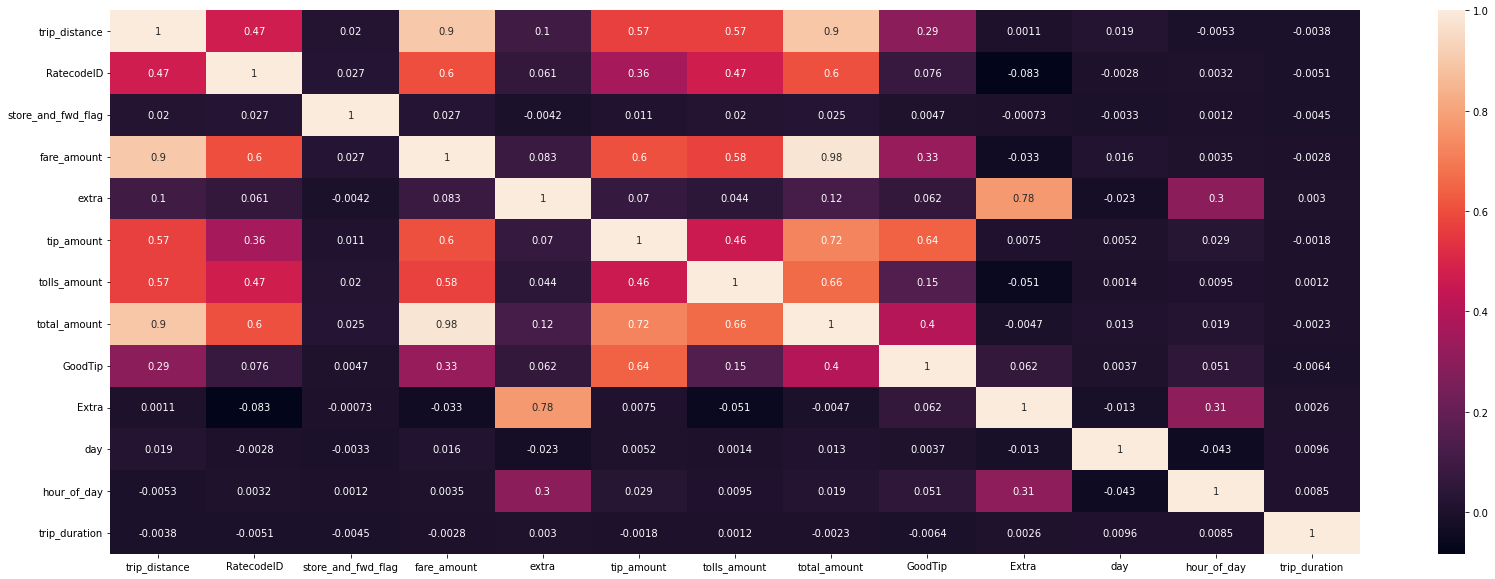

In [34]:
plt.figure(figsize= (28, 10))
sb.heatmap(td.corr(), annot= True);

In [35]:
y=td.GoodTip
print(x1)

       trip_distance  RatecodeID  store_and_fwd_flag  fare_amount     extra  \
2           0.008741         0.0                 0.0     0.021359  0.090909   
3           0.007547         0.0                 0.0     0.019417  0.000000   
23          0.012976         0.0                 0.0     0.040777  0.090909   
25          0.009555         0.0                 0.0     0.023301  0.090909   
33          0.037950         0.0                 0.0     0.069903  0.090909   
...              ...         ...                 ...          ...       ...   
28274       0.011293         0.0                 0.0     0.029126  0.000000   
28275       0.015690         0.0                 0.0     0.038835  0.000000   
28276       0.004289         0.0                 0.0     0.011650  0.000000   
28277       0.016505         0.0                 0.0     0.040777  0.000000   
28278       0.024594         0.0                 0.0     0.075728  0.000000   

       tip_amount  tolls_amount  total_amount  Extr

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.15, random_state = 42)

In [37]:
len(y_train)

23482

# Logistic Regression 

In [38]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [39]:
model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_predicted = model.predict(x_test)
model.predict_proba(x_test)
model.score(x_test,y_test)

0.9266586248492159

# Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
x2 = RandomForestClassifier(n_estimators=105)
x2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=105)

In [42]:
x2.score(x_test, y_test)

1.0

# KNN (K Neighrest Neighbour Classifier)

k=10

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9189384800965018

For k=5

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.93437876960193

# Classification Report

In [45]:
from sklearn.metrics import classification_report
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2526
           1       0.92      0.91      0.92      1619

    accuracy                           0.93      4145
   macro avg       0.93      0.93      0.93      4145
weighted avg       0.93      0.93      0.93      4145

